In [27]:
import numpy as np
import pandas as pd

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducinility
np.random.seed(0)

%matplotlib inline

In [ ]:
"""Sacling: change the range of your data"""
"""Normolization: change the shape of your distribution"""

Text(0.5, 1.0, 'Normalized Data')

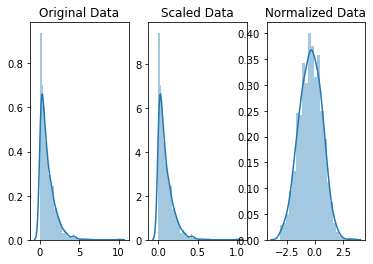

In [38]:
# generate 100 dp randomly drawn from an exponential distribution
original = np.random.exponential(size=1000)
"""Scaling"""
# mix-max scale the data between 0 and 1
scaled = minmax_scaling(original, columns=[0])
"""Normalization"""
# normalize the exponential data with boxcox
normalized = stats.boxcox(original)

# plot both for comparison
fig, ax = plt.subplots(1, 3)
sns.distplot(original, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled, ax=ax[1])
ax[1].set_title("Scaled Data")
sns.distplot(normalized[0], ax=ax[2])
ax[2].set_title("Normalized Data")

Text(0.5, 1.0, 'Normalized Data')

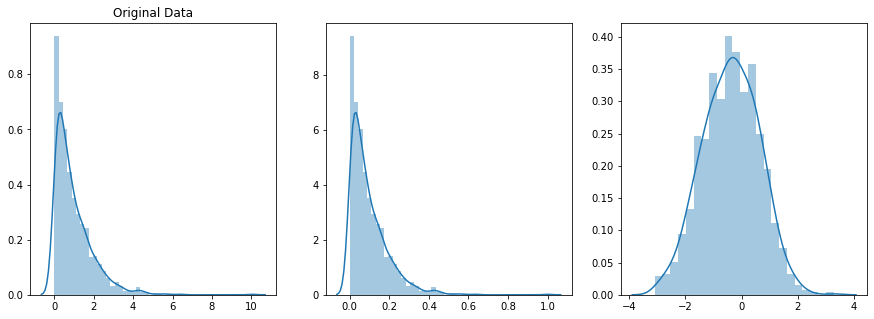

In [42]:
# plot both for comparison
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
sns.distplot(original, ax=ax1)
ax1.set_title("Original Data")
ax2 = fig.add_subplot(132)
sns.distplot(scaled, ax=ax2)
ax[1].set_title("Scaled Data")
ax3 = fig.add_subplot(133)
sns.distplot(normalized[0], ax=ax3)
ax[2].set_title("Normalized Data")

Text(0.5, 1.0, 'Normalized Data')

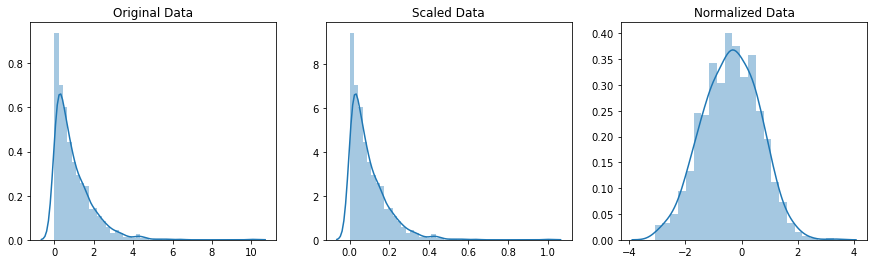

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
sns.distplot(original, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled, ax=ax[1])
ax[1].set_title("Scaled Data")
sns.distplot(normalized[0], ax=ax[2])
ax[2].set_title("Normalized Data")

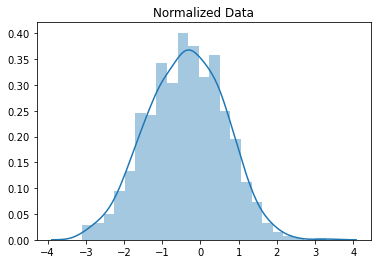

In [52]:
# or 
normalized1, _ = stats.boxcox(original)
sns.distplot(normalized1)
plt.title("Normalized Data")
plt.show()

In [48]:
"""Practice with some real data"""
# read in data
ks2017 = pd.read_csv('C:/Users/Victiny/Python_Project/Data_Cleaning/data_example/kickstarters_2017.csv', index_col=0)
ks2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Text(0.5, 1.0, 'Scaled')

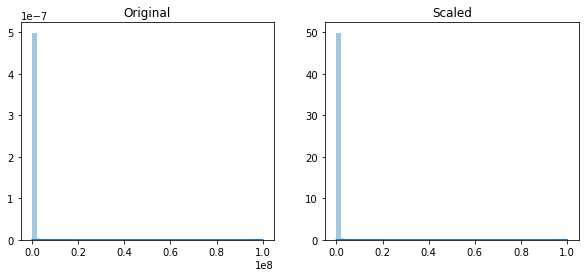

In [55]:
original_goal = pd.DataFrame(ks2017['goal'])
scaled_goal = minmax_scaling(original_goal, columns=['goal'])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.distplot(original_goal, ax=ax[0])
ax[0].set_title('Original')
sns.distplot(scaled_goal, ax=ax[1])
ax[1].set_title('Scaled')

Text(0.5, 1.0, 'normalized')

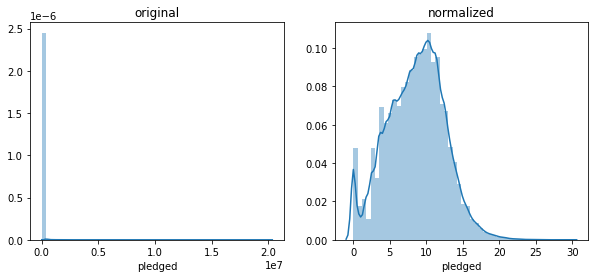

In [68]:
"""Box-Cox only takes positive values"""
# get the index of all positive pledges
idx_pos = ks2017['pledged'] > 0
pos_pledged = ks2017['pledged'].loc[idx_pos]
# normalize the pledges
norm_pledged = pd.Series(stats.boxcox(pos_pledged)[0],
                         name='pledged', 
                         index=pos_pledged.index)
# plot both
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.distplot(pos_pledged, ax=ax[0])
sns.distplot(norm_pledged, ax=ax[1])
ax[0].set_title('original')
ax[1].set_title('normalized')